In [ ]:
import os
os.environ['PROJ_LIB']='/Users/vmullachery/anaconda/envs/dl3.6/share/proj'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib nbagg

my_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
          lat_0=0, lon_0=-130)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'gray')
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x,y = my_map(0, 0)
point = my_map.plot(x, y, 'ro', markersize=5)[0]

def init():
    point.set_data([], [])
    return point,

# animation function.  This is called sequentially
def animate(i):
    lons, lats =  np.random.random_integers(-130, 130, 2)
    #print(lons)
    x, y = my_map(lons, lats)
    point.set_data(x, y)
    return point,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=100, interval=300, blit=True)

plt.show()

In [ ]:
import os
os.environ['PROJ_LIB']='/Users/vmullachery/anaconda/envs/dl3.6/share/proj'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation

%matplotlib nbagg

fig = plt.figure(figsize=(10, 10))
my_map = Basemap(projection='lcc', resolution=None,
            width=12E6, height=8E6, 
            lat_0=10, lon_0=-120)
my_map.etopo(scale=0.6, alpha=0.5)


##### Waypoint 50 to 100 #####
df_new = pd.read_csv('outputs/pol_300jun22.csv')
lat = df_new['lat'].values
lon = df_new['lon'].values

my_map.scatter(lon, lat, latlon=True,alpha=0.25, c='b')

#df_new = pd.read_csv('outputs/pol_300jun21.csv')
#lat = df['lat'].values
#lon = df['lon'].values
#my_map.scatter(lon, lat, latlon=True,alpha=0.25, c='g')


df_hist = pd.read_csv('proc_voyage1-2-2.csv')
olat = df_hist['lat'].values[50:300]
olon = df_hist['lon'].values[50:300]
my_map.scatter(olon, olat, latlon=True, alpha=.25,c='r')

plt.show()

<IPython.core.display.Javascript object>


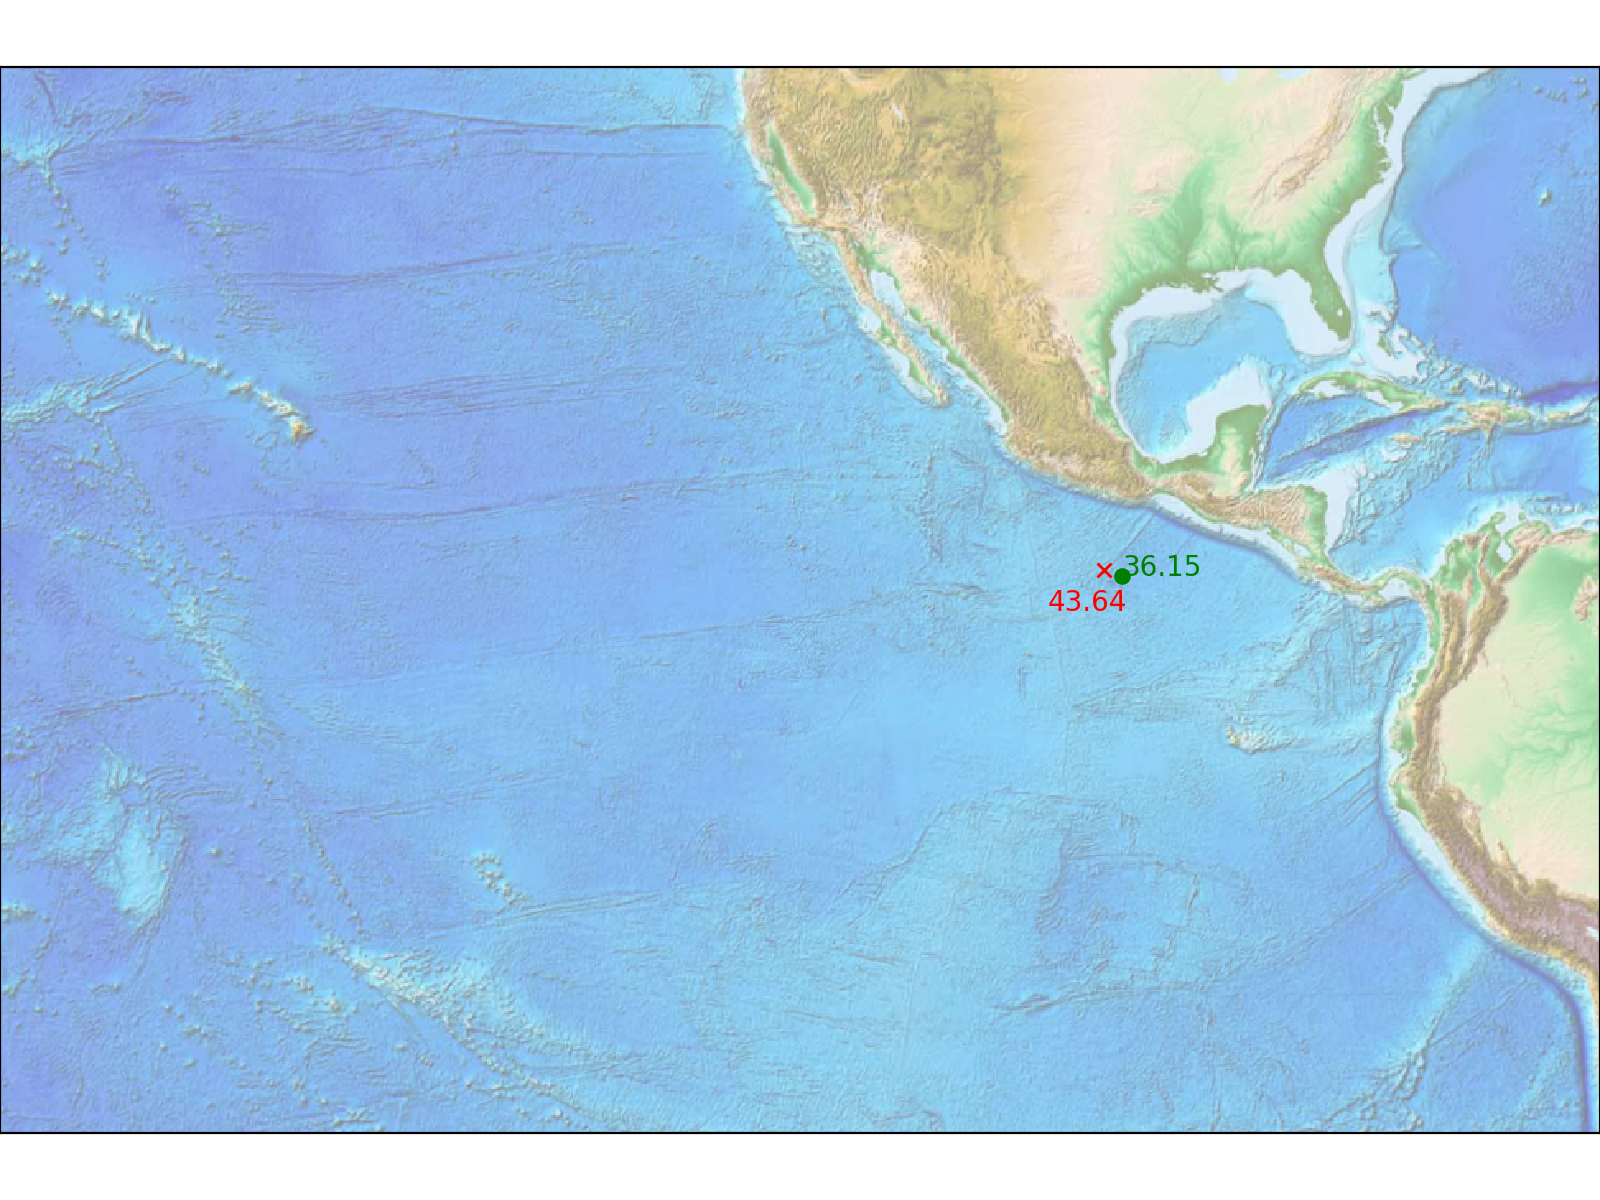

In [2]:
import os
os.environ['PROJ_LIB']='/Users/vmullachery/anaconda/envs/dl3.6/share/proj'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation

%matplotlib nbagg

#fig = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize = (8,6))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

my_map = Basemap(projection='lcc', resolution=None,
            width=12E6, height=8E6, 
            lat_0=10, lon_0=-120)
my_map.etopo(scale=0.6, alpha=0.5)


##### Waypoint 50 to 100 #####
df_new = pd.read_csv('outputs/pol_300jun22.csv')
#lat = df['lat'].values
#lon = df['lon'].values

#my_map.scatter(lon, lat, latlon=True,alpha=0.25, c='b')

#df_new = pd.read_csv('outputs/pol_300jun21.csv')
#lat = df['lat'].values
#lon = df['lon'].values
#my_map.scatter(lon, lat, latlon=True,alpha=0.25, c='g')


df_hist = pd.read_csv('proc3_voyage1-2-2.csv')
#olat = df['lat'].values[50:300]
#olon = df['lon'].values[50:300]
#my_map.scatter(olon, olat, latlon=True, alpha=.25,c='r')

x,y = my_map(0, 0)
point_hist = my_map.plot(x, y, 'rx', markersize=5)[0]
point_new = my_map.plot(x, y, 'go',markersize=5)[0]
point_dest = my_map.plot(x, y,'kh',markersize=5)[0]
#point_dest.set_data(df_new['lon'].values[-1], df_new['lat'].values[-1])

ann_hist = ax.annotate('', xy=(0,0))
ann_new = ax.annotate('', xy=(0,0))

def init():
    point_hist.set_data([], [])
    point_new.set_data([], [])
    return point_hist,point_new,ann_hist,ann_new,

# animation function.  This is called sequentially
def animate(i):
#     lats =  np.random.random_integers(-5, 15, 1)
#     lons =  np.random.random_integers(-100, -80, 1)
    lats = df_hist['lat'].values[i]
    lons = df_hist['lon'].values[i]
    x, y = my_map(lons, lats)
    point_hist.set_data(x, y)
    
    ann_hist.set_text('{:.2f}'.format(df_hist['cost'].cumsum()[i]))
    ann_hist.set_color('r')
    ann_hist.set_position(my_map(lons-4,lats-2.5))
    
    llats = df_new['lat'].values[i]
    llons = df_new['lon'].values[i]
    lx, ly = my_map(llons, llats)
    point_new.set_data(lx, ly)
    
    ann_new.set_text('{:.2f}'.format(df_new['cost'].cumsum()[i]))
    ann_new.set_color('g')
    ann_new.set_position(my_map(llons,llats))
    
    return point_hist,point_new,ann_hist,ann_new,

# call the animator.  blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
#                               frames=350, interval=25, blit=True)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=266, interval=25, blit=True)

# n_costs = df_new['cost'].cumsum()
# x = df_new['lon'].values
# y = df_new['lat'].values
# for i, (cost, xpt, ypt) in enumerate(zip(n_costs, x, y)):
#     if i % 20 == 0:
#         plt.text(xpt, ypt, str(cost))

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('nav3.mp4', writer)

plt.show()

In [ ]:
df_new['lon'].values[-1], df_new['lat'].values[-1]
df_new['cost'].cumsum()[2]

In [ ]:
fig=plt.figure(figsize=(10,10))
x = np.arange(205)
plt.scatter(df_hist['lon'][50+x], df_hist['lat'][50+x])
x = np.arange(250)
plt.scatter(df_new['lon'][x], df_new['lat'][x],c='g')
#print(df_hist['lon'][50+x])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
import matplotlib.animation as animation


N_points = 10

# create N_points initial points
x,y,z = np.random.normal(size=(3,N_points), loc=0, scale=10)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
graph = ax.scatter(x, y, z, color='orange')
debug_text = fig.text(0, 1, "TEXT", va='top')  # for debugging
annots = [ax.text2D(0,0,"POINT") for _ in range(N_points)] 


def update(num, my_ax):
    # the following corresponds to whatever logic must append in your code
    # to get the new coordinates of your points
    # in this case, we're going to move each point by a quantity (dx,dy,dz)
    dx, dy, dz = np.random.normal(size=(3,N_points), loc=0, scale=1) 
    debug_text.set_text("{:d}".format(num))  # for debugging
    x,y,z = graph._offsets3d
    new_x, new_y, new_z = (x+dx, y+dy, z+dz)
    graph._offsets3d = (new_x, new_y, new_z)
    for t, new_x_i, new_y_i, new_z_i in zip(annots, new_x, new_y, new_z):
        # animating Text in 3D proved to be tricky. Tip of the hat to @ImportanceOfBeingErnest
        # for this answer https://stackoverflow.com/a/51579878/1356000
        x_, y_, _ = proj3d.proj_transform(new_x_i, new_y_i, new_z_i, my_ax.get_proj())
        t.set_position((x_,y_))
    return [graph,debug_text]+annots


# Creating the Animation object
ani = animation.FuncAnimation(fig, update, fargs=[ax], frames=100, interval=50, blit=True)
plt.show()